# **Introdução a DataScience com Python**


##**Análise do dataset Titanic**

### Upload do arquivo


In [58]:
# Importando o submódulo files da biblioteca google.colab
from google.colab import files

files.upload()



Saving train.csv to train (1).csv


{'train (1).csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,

### Importação das bibliotecas

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Primeiras impressões

In [60]:
# Carregando o dataset do Titanic utilziando a biblioteca Pandas
df = pd.read_csv("train.csv")

# Visualizando as primeiras linhas para ter uma ideia dos dados
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [61]:
# Verificando informações básicas do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Análise e Limpeza

#### Lidando com Dados Ausentes

In [62]:
# Verificando a quantidade de valores nulos
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


A coluna "Age" tem mais dados que não são nulos do que dados nulos. Dessa forma, remover a coluna toda não é uma boa abordagem.
Vamos preencher os dados nulos dessa coluno com o valor da média (ou mediana) da idade.


In [63]:
media_idade = df["Age"].median()
df["Age"] = df["Age"].fillna(media_idade)

# print(df.isnull().sum())

A coluna "Embarked" contêm poucas linhas com valores nulos. Assim, vamos preencher os valores nulos com o valor mais comum.

In [64]:
moda_embarque = df["Embarked"].mode()[0]
df["Embarked"] = df["Embarked"].fillna(moda_embarque)

A coluna "Cabin" contêm uma grande quantidade de valores nulos. Vamos remover essa coluna, pois no momento ela não será útil para nossa análise.

IMPORTANTE:

axis=0 (eixo 0): Representa as linhas (índice do DataFrame). A operação será aplicada ao longo das linhas.

axis=1 (eixo 1): Representa as colunas. A operação será aplicada ao longo das colunas.

In [65]:
df.drop("Cabin", axis=1, inplace=True)

Vamos analisar como ficou nosso DataFrame após as alterações

In [66]:
print(df.isnull().sum())
print(df.info())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


### **Análise Exploratória de Dados**

#### Taxa de Sobrevivência Geral

A coluna "Survived" apresenta valor 0 para "não sobreviveu" e 1 para "sobreviveu".

IMPORTANTE:

Ao adicionar normalize=True, na função value_counts, o Pandas faz a contagem, mas depois divide o resultado pelo total de linhas (passageiros, neste caso). O resultado será um valor entre 0 e 1, que representa a proporção de cada categoria. Multiplicamos o valor por 100 para termos a porcentagem.

In [67]:
sobrevivencia_geral = df["Survived"].value_counts(normalize=True) * 100
print(sobrevivencia_geral)

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


#### Análise por Gênero

In [68]:
sobrevivencia_genero = df.groupby("Sex")["Survived"].mean() * 100
print(sobrevivencia_genero)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


#### Análise por Classe (Pclass)

In [69]:
sobrevivencia_classe = df.groupby("Pclass")["Survived"].mean() * 100
print(sobrevivencia_classe)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


#### Análise da taxa de sobrevivência por faixa etária

Vamos primeiro criar uma nova coluna no nosso DataFrame chamada "Age_Group". Para isso, vamos utilizar a função pd.cut() para dividir os passageiros em grupos.

In [70]:
# Definindo os limites de cada faixa etária
bins = [0,12,18,35,60,100]

# Definindo os rótulos para cada faixa
labels = ["Criança","Adolescente", "Jovem Adulto", "Adulto", "Idoso"]

# Criando a nova coluna "Age-Group"
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False) # right=False: Isso garante que o limite superior não seja incluído no intervalo. Por exemplo, a primeira faixa vai de 0 até 11.99 anos.

# Visualizando as primeiras linhas com a nova coluna
#print(df.head())
print(df[["Age", "Age_Group","Survived"]].head())

    Age     Age_Group  Survived
0  22.0  Jovem Adulto         0
1  38.0        Adulto         1
2  26.0  Jovem Adulto         1
3  35.0        Adulto         1
4  35.0        Adulto         0


In [71]:
# Calculando a média de sobrevivência (0 = nao, 1 = sim) para cada grupo
sobrevivencia_por_idade = df.groupby("Age_Group")["Survived"].mean() * 100
print(sobrevivencia_por_idade)

Age_Group
Criança         57.352941
Adolescente     48.888889
Jovem Adulto    34.438306
Adulto          41.626794
Idoso           26.923077
Name: Survived, dtype: float64


/tmp/ipython-input-2718875985.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sobrevivencia_por_idade = df.groupby("Age_Group")["Survived"].mean() * 100


#### Análise da coluna "Fare" (Tarifa)

In [72]:
# Estatísticas descritivas para a coluna "Fare"
print(df["Fare"].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


### **Visualização de Dados**

**Sobrevivência por gênero**

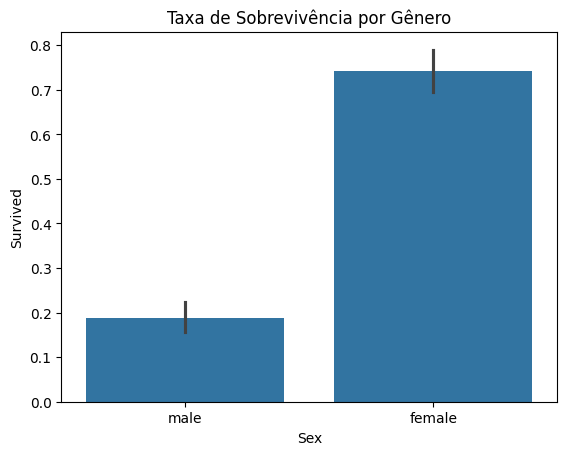

In [73]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Taxa de Sobrevivência por Gênero')
plt.show()

**Sobrevivência por Classe e Gênero (Combinado)**

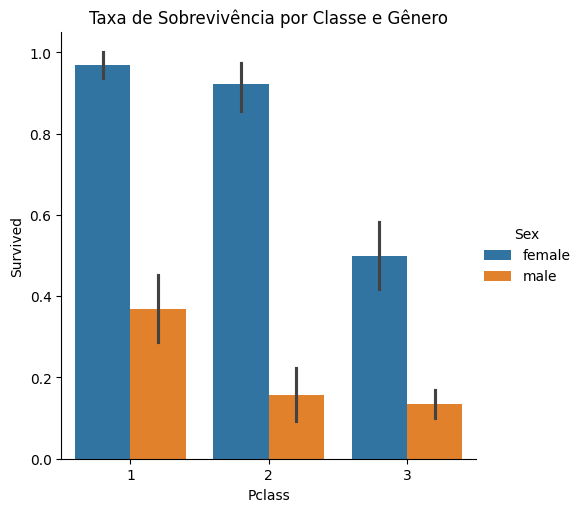

In [74]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=df)
plt.title('Taxa de Sobrevivência por Classe e Gênero')
plt.show()

**Sobrevivência por Faixa Etária**

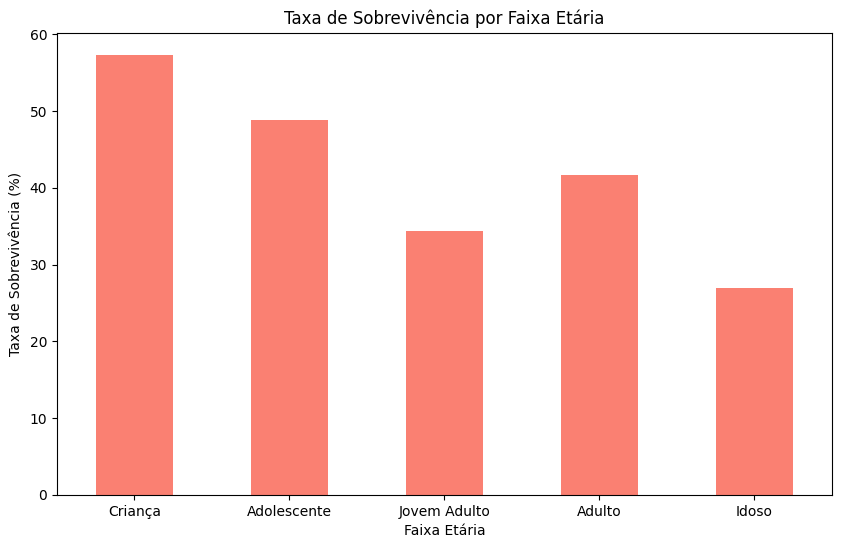

In [75]:
plt.figure(figsize=(10, 6))
sobrevivencia_por_idade.plot(kind='bar', color='salmon')
plt.title('Taxa de Sobrevivência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.xticks(rotation=0)
plt.show()

**Visualizando a Distribuição de "Fare"**

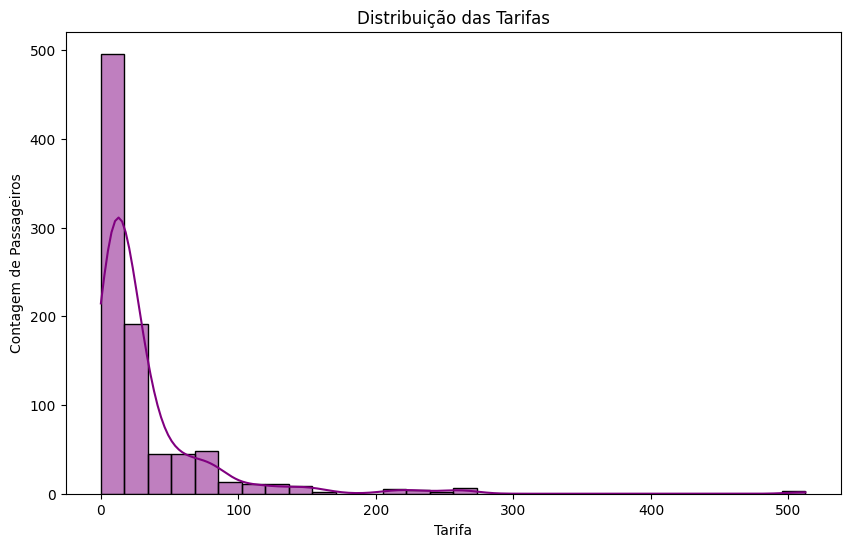

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True, bins=30, color='purple')
plt.title('Distribuição das Tarifas')
plt.xlabel('Tarifa')
plt.ylabel('Contagem de Passageiros')
plt.show()

**Sobrevivência vs. Tarifa**

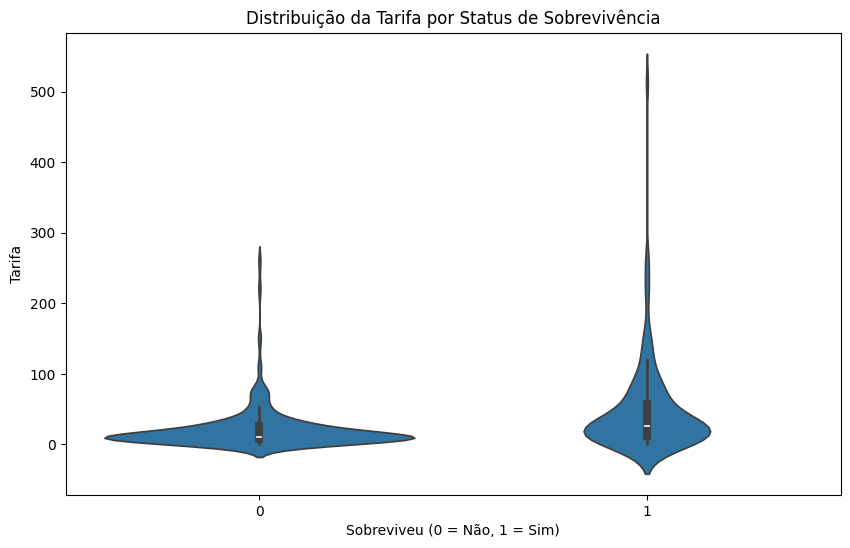

In [77]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Fare', data=df)
plt.title('Distribuição da Tarifa por Status de Sobrevivência')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Tarifa')
plt.show()